In [2]:
# -*- coding: utf-8 -*-

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sodapy import Socrata

In [4]:
#Ver n columnas y filas para data frames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

# Consulta de info a Datos abiertos

Se usa Socrata como plataforma de catálogo de datos abiertos tipo SaaS que facilita una versión de código abierto de su API para el acceso y actualización de los datos

In [5]:
# Enter the information from those sections here
socrata_domain = 'www.datos.gov.co'
socrata_dataset_identifier = 'rpmr-utcd'

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("SODAPY_APPTOKEN")

### Exploracion inicial

In [6]:
#Configuracion del cliente para realizar petición Get
client = Socrata(socrata_domain
                 ,None
                 #, socrata_token
                 )
print(client.__dict__)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

{'domain': 'www.datos.gov.co', 'session': <requests.sessions.Session object at 0x000001A958391D00>, 'uri_prefix': 'https://', 'timeout': 10}
Domain: www.datos.gov.co
Session: <requests.sessions.Session object at 0x000001A958391D00>
URI Prefix: https://


Vista general de funcionamiento

In [7]:
#Consulta metadata del set de datos
metadata = client.get_metadata(socrata_dataset_identifier)
[x['name'] for x in metadata['columns']]

['Nivel Entidad',
 'Nombre de la Entidad',
 'NIT de la Entidad',
 'Departamento Entidad',
 'Municipio Entidad',
 'Estado del Proceso',
 'Modalidad de Contratación',
 'Objeto a Contratar',
 'Objeto del Proceso',
 'Tipo de Contrato',
 'Fecha de Firma del Contrato',
 'Fecha Inicio Ejecucion',
 'Fecha Fin Ejecucion',
 'Tipo Contrato',
 'ID Contrato',
 'ID Proceso',
 'Valor Contrato',
 'Nom Raz Social Contratista',
 'URL Contrato',
 'Origen',
 'Documento Proveedor']

In [8]:
#La API por defecto esta configurado para una consulta de 1000 registros sin token
results_ini = client.get(socrata_dataset_identifier)
df = pd.DataFrame.from_dict(results_ini)
df.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion
0,TERRITORIAL,CESAR ESE HOSPITAL FRANCISCO CANOSSA PELAYA,800150497,CESAR,PELAYA,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,SUMINISTRO DE COMBUSTIBLE Y LUBRICANTES CON DE...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,15-4-3551603,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
1,No Definido,ART,901006886,Distrito Capital de Bogot�,Distrito Capital de Bogot�,Activo,Contrataci�n directa,Prestar servicios profesionales para apoyar de...,Prestar servicios profesionales para apoyar de...,Prestaci�n de servicios,Prestaci�n de servicios,CO1.PCCNTR.795421,CO1.BDOS.715970,94760000,SAIRA MARCELA ARTEAGA SILVA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,41057101,02/01/2019,2019-02-02T00:00:00.000,2019-10-01T00:00:00.000
2,TERRITORIAL,BOGOTA DC IED CLEMENCIA HOLGUIN DE URDANETA,NO DEFINIDO,BOGOTA DC,BOGOTA DC,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,SUMINISTRO DE MATERIAL DIDACTICO Y UTILES DE O...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,18-4-8081720,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
3,TERRITORIAL,MAGDALENA ESE HOSPITAL UNIVERSITARIO JULIO ME...,891780185,MAGDALENA,SANTA MARTA,CONVOCADO,REGIMEN ESPECIAL,NO DEFINIDO,PRESTAR LOS SERVICIOS PROFESIONALES COMO ENFER...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,21-4-12587285,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
4,TERRITORIAL,ATLANTICO ALCALDIA MUNICIPIO DE PONEDERA,890116278,ATLANTICO,PONEDERA,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,PRESTACION DE SERVICIOS DE APOYO OPERATIVO Y L...,PRESTACION DE SERVICIOS,PRESTACION DE SERVICIOS,NO DEFINIDO,22-13-13135973,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN


Comprobación de tamaño permitido de consulta:

In [9]:
df.shape

(1000, 21)

Tipo de respuesta del get almacenada:

In [10]:
type(results_ini)

list

Nombres de columnas en data frame

In [11]:
print(df.columns)

Index(['nivel_entidad', 'nombre_de_la_entidad', 'nit_de_la_entidad',
       'departamento_entidad', 'municipio_entidad', 'estado_del_proceso',
       'modalidad_de_contrataci_n', 'objeto_a_contratar', 'objeto_del_proceso',
       'tipo_de_contrato', 'tipo_contrato', 'numero_del_contrato',
       'numero_de_proceso', 'valor_contrato', 'nom_raz_social_contratista',
       'url_contrato', 'origen', 'documento_proveedor',
       'fecha_de_firma_del_contrato', 'fecha_inicio_ejecucion',
       'fecha_fin_ejecucion'],
      dtype='object')


### Consulta final

Teniendo en cuenta el tamaño total del conjunto de datos (3.93 M) y para facilitar el cumplimiento del ejercicio de acuerdo a las herramientas y condiciones con las que se cuenta (memoria local, etc.) se decide restringir la consulta sólo a un tipo de entidad pública que desarrolla el proceso de compra pública (INPEC) 

Configuración de parámetros de paginación para obtener el total de registros requeridos:

In [12]:
#Inicialización de parámetros
limit_par = 1000 #Limite superior
offset_par = 0 #Limite inferior
total_records = 0

#Inicialización de DataFrame para almacenamiento de consulta de datos
df_temp = pd.DataFrame()

In [13]:
while True:
    
    #La API Socrata permite customizar los queries para consultas suministrando parámetros para tal fin   
    results_af = client.get(socrata_dataset_identifier, limit = limit_par, offset = offset_par, where = "nombre_de_la_entidad like '%INPEC%'")
    
    #Valida si la consulta arrojó algún resultado. Si no encuentra resultados puede que:
    #1. No se cumplan las condiciones del query
    #2. Ya no hay más resultados que cumplan
    if len(results_af) > 0:
        #Se tomas los datos arrojados a la lista inicial y se pasan a un dataframe
        df_cons = pd.DataFrame.from_dict(results_af)
        #Se concatena en el df inicializado para acumular las consultas (cada 1000 registros)
        df_temp = pd.concat([df_temp, df_cons])
        
        #Actualiza el offset preparando la siguiente pagina de resultados:
        offset_par += limit_par
        total_records += len(results_af) 
    else:
        break
print(f"Total de registros obtenidos: {total_records}")
    

Total de registros obtenidos: 20195


Almancenamiento de consulta inicial en csv

In [14]:
df_temp.to_csv('data.csv', index=False)

In [15]:
pd.set_option('display.encoding', 'utf-8')

### Exploración de consulta final

In [16]:
df_temp.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,811010125,Antioquia,Yarumal,Activo,M�nima cuant�a,Contratar la adquisici�n de una greca gemela c...,Contratar la adquisici�n de una greca gemela c...,Compraventa,04/25/2018,2018-04-26T00:00:00.000,2018-05-18T00:00:00.000,Compraventa,CO1.PCCNTR.403532,CO1.BDOS.401027,790000,PAPELERIA EL CID SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,800021033
1,No Definido,ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN...,827000237,"San Andr�s, Providencia y Santa Catalina",No Definido,Cerrado,M�nima cuant�a,COMPRA DE ARTICULOS DEPORTIVOS DESTINADOS AL F...,CONTRATAR LA COMPRA DE ARTICULOS DEPORTIVOS DE...,Compraventa,05/04/2022,2022-05-05T00:00:00.000,2022-05-30T00:00:00.000,Compraventa,CO1.PCCNTR.3671568,CO1.BDOS.2909038,5846623,CRR SOLUCIONES INTEGRALES SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,901406206
2,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,826000802,Boyac�,Santa Rosa De Viterbo,Cerrado,M�nima cuant�a,CONTRATAR EL SUMINISTRO ACEITES Y LUBRICANTES ...,CONTRATAR EL SUMINISTRO ACEITES Y LUBRICANTES ...,Suministros,05/22/2020,2020-05-22T00:00:00.000,2020-11-30T00:00:00.000,Suministros,CO1.PCCNTR.1559028,CO1.BDOS.1233611,3283625,LUBRICENTRO SANTA ROSA SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900569245
3,No Definido,CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURI...,810006053,Caldas,La Dorada,Activo,M�nima cuant�a,ADQUISICION DE PRODUCTOS DE ASEO Y LIMPIEZA CO...,CONTRATAR LA ADQUISICION DE PRODUCTOS DE ASEO ...,Suministros,03/21/2019,2019-03-15T00:00:00.000,2019-12-31T00:00:00.000,Suministros,CO1.PCCNTR.893422,CO1.BDOS.780444,75760000,EDUARDO JIMENEZ FAJARDO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,17640695
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SELECCIONAR Y CONTRATAR EL SUMINISTRO DE PRODU...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4847953,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [17]:
df_temp.shape

(20195, 21)

Valida tipo de datos de columnas:

In [19]:
df_temp.dtypes

nivel_entidad                  object
nombre_de_la_entidad           object
nit_de_la_entidad              object
departamento_entidad           object
municipio_entidad              object
estado_del_proceso             object
modalidad_de_contrataci_n      object
objeto_a_contratar             object
objeto_del_proceso             object
tipo_de_contrato               object
fecha_de_firma_del_contrato    object
fecha_inicio_ejecucion         object
fecha_fin_ejecucion            object
tipo_contrato                  object
numero_del_contrato            object
numero_de_proceso              object
valor_contrato                 object
nom_raz_social_contratista     object
url_contrato                   object
origen                         object
documento_proveedor            object
dtype: object

Descripción general de contenido:

In [20]:
df_temp.describe(include= 'all')

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
count,20195,20195,20195,20195,20195,20195,20195,20195,20195,20195,7528,7537,7933,20195,20195,20195,20195,20195,20195,20195,20195
unique,3,41,40,22,30,17,21,6538,16968,22,1479,1474,1263,22,8048,19545,5057,2082,19545,2,2048
top,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,Sin Descripcion,SUMINISTRO,05/08/2023,2017-02-01T00:00:00.000,2018-12-31T00:00:00.000,SUMINISTRO,NO DEFINIDO,CO1.BDOS.1029909,0,NO DEFINIDO,https://community.secop.gov.co/Public/Tenderin...,SECOP I,NO DEFINIDO
freq,12098,12098,12937,12098,12098,5951,11087,12098,168,5788,50,49,390,5788,12098,7,12140,12098,7,12098,12098


Verificación de valores únicos de columnas

In [21]:
#No todas las columnas me interesan o algunas de ellas tienes muchos valores por su naturaleza
column_exclu = ['objeto_a_contratar', 'nit_de_la_entidad', 'documento_proveedor', 'departamento_entidad', 'municipio_entidad'
              , 'fecha_de_firma_del_contrato', 'fecha_inicio_ejecucion', 'fecha_inicio_ejecucion', 'fecha_fin_ejecucion', 'valor_contrato'
              , 'numero_del_contrato', 'numero_de_proceso', 'nom_raz_social_contratista', 'url_contrato'
              , 'documento_proveedor']

#Crear df sin columnas que no se van a analizar sus valores unicos
df_to_show_unique = df_temp.drop(column_exclu, axis=1 )

for column in df_to_show_unique.columns:
    unique_values = df_to_show_unique[column].unique()
    print(f"Valores únicos de {column}:")
    print(unique_values)
    print('*' * 10)

Valores únicos de nivel_entidad:
['No Definido' 'NACIONAL' 'Territorial']
**********
Valores únicos de nombre_de_la_entidad:
['ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE YARUMAL INPEC'
 'ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN ANDRES INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE SANTA ROSA DE VITERBO  INPEC'
 'CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC'
 'INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC'
 'CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC'
 'ESCUELA DE FORMACION INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE ARAUCA  INPEC'
 'INPECCARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BOGOTA'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE YOPAL  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD DE SAN GIL SANTANDER  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD DE RAMIRIQUI  INPEC'
 'ESTABLECIMIE

Valida columnas con nulos (NaN) con conteos. Si el valor el 0 no cuenta como nulo

In [22]:
df_temp.isnull().sum()

nivel_entidad                      0
nombre_de_la_entidad               0
nit_de_la_entidad                  0
departamento_entidad               0
municipio_entidad                  0
estado_del_proceso                 0
modalidad_de_contrataci_n          0
objeto_a_contratar                 0
objeto_del_proceso                 0
tipo_de_contrato                   0
fecha_de_firma_del_contrato    12667
fecha_inicio_ejecucion         12658
fecha_fin_ejecucion            12262
tipo_contrato                      0
numero_del_contrato                0
numero_de_proceso                  0
valor_contrato                     0
nom_raz_social_contratista         0
url_contrato                       0
origen                             0
documento_proveedor                0
dtype: int64

In [23]:
#Filas que continen valores nulos. 
null_row = df_temp[df_temp.isnull().any(axis = 1)]
null_row

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SELECCIONAR Y CONTRATAR EL SUMINISTRO DE PRODU...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4847953,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
6,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,PROCESO DE SELECCION DE MINIMA CUANTIA PARA CO...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4915567,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
7,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE ALIMENTOS ENLATADOS Y CHOCOLATI...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,15-13-4212243,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
8,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SUMINISTRO DE COMBUSTIBLE GASOLINA ACPM PARA L...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,13-13-2086719,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
9,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SUMINISTRO DE COLCHONETAS PARA LOS INTERNOS DE...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,15-13-3739681,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONTRATAR EL SIMINISTRO DE UTILES ESCOLARES E ...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,14-13-2708662,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
191,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE ELEMENTOS DE CONSUMO FINAL PARA...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-5196906,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
192,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONTRATAR EL SUMINISTRO DE BEBIDAS GASEOS...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,12-13-812174,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
193,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,COMPRA DE MATERIALES DE CONSTRUCCION PARA ADEC...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,12-13-1090864,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [24]:
#Validar valor de contrato en 0
df_temp['valor_contrato'] = df_temp['valor_contrato'].astype(float)
df_contract_0 = df_temp[df_temp['valor_contrato'] == 0]
df_contract_0.shape

(12140, 21)

Frecuencias de estado del proceso

Text(0.5, 1.0, 'Frecuencias de estado de proceso')

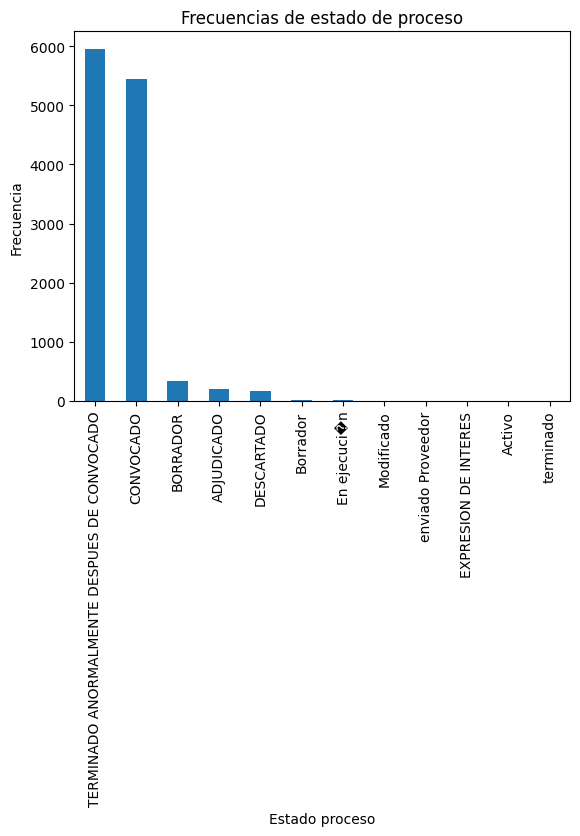

In [26]:
state_process = df_contract_0['estado_del_proceso'].value_counts()
state_process.plot(kind = 'bar')

#Agrega etiquetas y label al gráfico
plt.xlabel('Estado proceso')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de estado de proceso')

Verificamos cuáles de los contratos con valor en 0 tiene fecha de firma informado.

In [31]:
date_val = df_contract_0['fecha_de_firma_del_contrato'].value_counts()
date_val

fecha_de_firma_del_contrato
03/04/2021    3
11/17/2021    2
03/05/2021    2
11/22/2022    1
03/03/2021    1
02/03/2022    1
12/26/2022    1
10/25/2021    1
10/12/2022    1
12/17/2020    1
12/06/2018    1
07/27/2021    1
02/23/2023    1
01/08/2021    1
08/16/2022    1
01/13/2021    1
Name: count, dtype: int64

In [36]:
date_val.count()/df_contract_0.shape[0]

0.0013179571663920922

Dado que no conocemos causales de fechas de contratación sin informar ni valores de contratos en 0, y nuestro objetivo es verificar datos historicos de contratación relacionados a montos y fechas etc., y tendríamos que contactar a dueños de datos para hacer estas validaciones, diremos que los datos válidos para nuestro análisis corresponden a registros que no tengan estas características

In [135]:
#Crea df sin valores de contrato en 0
df_final = df_temp[df_temp['valor_contrato'] != 0]
df_final.shape

(8055, 21)

In [136]:
#Valida cifra de de contratos sin fecha de firma
df_final['fecha_de_firma_del_contrato'].isnull().sum()

547

In [137]:
#Registros a trabajar
df_temp.shape[0] - df_contract_0.shape[0] - df_final['fecha_de_firma_del_contrato'].isnull().sum()

7508

In [138]:
#Omitimos registros con sin fecha de firma de contrato
df_final = df_final[~df_final['fecha_de_firma_del_contrato'].isnull()]
df_final.shape

(7508, 21)

In [139]:
#Validacion de registro
df_final[df_final['numero_del_contrato'] == 'CO1.PCCNTR.972739']

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor


Para facilitar implementación de ejercicio se genera un campo con la estrutua YYYY-MM

In [140]:
#Estandarizacion de estructura de fecha A YYYY-MM-DD
#Tipos de estructura:
#   - YYYY-MM-DDT00:00:00.0000
#   - YYYY-MM-DD

df_final['fecha_de_firma_del_contrato'] = df_final['fecha_de_firma_del_contrato'].str.split('T').str.get(0)

In [141]:
df_final.dtypes

nivel_entidad                   object
nombre_de_la_entidad            object
nit_de_la_entidad               object
departamento_entidad            object
municipio_entidad               object
estado_del_proceso              object
modalidad_de_contrataci_n       object
objeto_a_contratar              object
objeto_del_proceso              object
tipo_de_contrato                object
fecha_de_firma_del_contrato     object
fecha_inicio_ejecucion          object
fecha_fin_ejecucion             object
tipo_contrato                   object
numero_del_contrato             object
numero_de_proceso               object
valor_contrato                 float64
nom_raz_social_contratista      object
url_contrato                    object
origen                          object
documento_proveedor             object
dtype: object

In [142]:
#Se extrae año
df_final['year_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(2)
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma
0,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,811010125,Antioquia,Yarumal,Activo,M�nima cuant�a,Contratar la adquisici�n de una greca gemela c...,Contratar la adquisici�n de una greca gemela c...,Compraventa,04/25/2018,2018-04-26T00:00:00.000,2018-05-18T00:00:00.000,Compraventa,CO1.PCCNTR.403532,CO1.BDOS.401027,790000.0,PAPELERIA EL CID SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,800021033,2018
1,No Definido,ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN...,827000237,"San Andr�s, Providencia y Santa Catalina",No Definido,Cerrado,M�nima cuant�a,COMPRA DE ARTICULOS DEPORTIVOS DESTINADOS AL F...,CONTRATAR LA COMPRA DE ARTICULOS DEPORTIVOS DE...,Compraventa,05/04/2022,2022-05-05T00:00:00.000,2022-05-30T00:00:00.000,Compraventa,CO1.PCCNTR.3671568,CO1.BDOS.2909038,5846623.0,CRR SOLUCIONES INTEGRALES SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,901406206,2022


In [143]:
#Se extrae mes
df_final['month_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(0)

In [144]:
#Se genera campo a partir de la concatenación de año y mes
df_final['fecha_firma_yyyymm'] = df_final['year_firma'] + '-' + df_final['month_firma']

In [145]:
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma,month_firma,fecha_firma_yyymm
0,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,811010125,Antioquia,Yarumal,Activo,M�nima cuant�a,Contratar la adquisici�n de una greca gemela c...,Contratar la adquisici�n de una greca gemela c...,Compraventa,04/25/2018,2018-04-26T00:00:00.000,2018-05-18T00:00:00.000,Compraventa,CO1.PCCNTR.403532,CO1.BDOS.401027,790000.0,PAPELERIA EL CID SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,800021033,2018,04,2018-04
1,No Definido,ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN...,827000237,"San Andr�s, Providencia y Santa Catalina",No Definido,Cerrado,M�nima cuant�a,COMPRA DE ARTICULOS DEPORTIVOS DESTINADOS AL F...,CONTRATAR LA COMPRA DE ARTICULOS DEPORTIVOS DE...,Compraventa,05/04/2022,2022-05-05T00:00:00.000,2022-05-30T00:00:00.000,Compraventa,CO1.PCCNTR.3671568,CO1.BDOS.2909038,5846623.0,CRR SOLUCIONES INTEGRALES SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,901406206,2022,05,2022-05


Enviamos a csv la data para procesar en proyecto

In [148]:
df_final.to_csv('data_processed.csv', index=False )

In [149]:
df_final.shape


(7508, 24)

Para conectar con ejercicio

In [153]:
#Conversion de campo a tipo fecha
df_final['fecha_firma_yyymm'] = pd.to_datetime(df_final['fecha_firma_yyymm'])


In [171]:
#Filtro año
df_filt = df_final[df_final['year_firma'] == '2022']

In [174]:
#Se suma valor de contrato por fecha de firma
contract_value = df_filt.groupby('fecha_firma_yyymm')['valor_contrato'].sum()

Text(0, 0.5, 'Valores contrato')

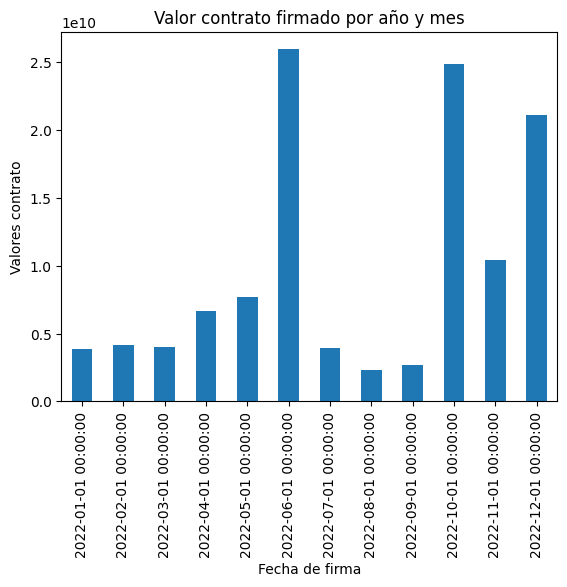

In [176]:
#Se grafica
contract_value.plot(kind ='bar')
plt.title('Valor contrato firmado por año y mes')
plt.xlabel('Fecha de firma')
plt.ylabel('Valores contrato')

In [155]:
df_final.dtypes

nivel_entidad                          object
nombre_de_la_entidad                   object
nit_de_la_entidad                      object
departamento_entidad                   object
municipio_entidad                      object
estado_del_proceso                     object
modalidad_de_contrataci_n              object
objeto_a_contratar                     object
objeto_del_proceso                     object
tipo_de_contrato                       object
fecha_de_firma_del_contrato            object
fecha_inicio_ejecucion                 object
fecha_fin_ejecucion                    object
tipo_contrato                          object
numero_del_contrato                    object
numero_de_proceso                      object
valor_contrato                        float64
nom_raz_social_contratista             object
url_contrato                           object
origen                                 object
documento_proveedor                    object
year_firma                        